In [380]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import ttest_ind
import statsmodels.stats.power as smp

1.1

Načítanie všetkých súborov do DataFrames

In [381]:
df_profiles=pd.read_csv("data/profiles.csv",sep='\t')
df_processes=pd.read_csv("data/processes.csv",sep='\t')
df_devices=pd.read_csv("data/devices.csv",sep='\t')
df_connections = pd.read_csv("data/connections.csv", sep='\t')
df_profiles.head()

,company,imei,name,ssn,registration,job,current_location,username,user_id,mail,residence,birthdate
0,Beck-Wright,863033069630348784,Gregory Santiago,493-70-5760,"05/04/2023, 00:00:00",NaN,"(Decimal('-10.6042995'), Decimal('-73.662677'))",zacharyclayton,474,xraymond@hotmail.com,NaN,NaN
1,"Phillips, Dixon and Garrett",3590433799317661115,Tom Fisher,598-97-2312,2020-05-09,NaN,"(Decimal('-48.1319165'), Decimal('176.559852'))",dustin49,1307,kevin90@hotmail.com,39281 Brianna Pines Suite 226\r\nMatthewcheste...,NaN
2,Manning LLC,863033069630348826,Howard Garcia,383-26-6902,21 Aug 2021,Animator,"(Decimal('44.7109925'), Decimal('-20.066520'))",davidstone,2255,holmestommy@yahoo.com,NaN,NaN
3,"Duarte, Campbell and Escobar",863033069630348263,Andrew Montoya,556-81-7215,"03/12/2023, 00:00:00",NaN,"(Decimal('30.7550255'), Decimal('81.033571'))",juliehayes,1319,john38@gmail.com,"39662 Kenneth Locks Apt. 893\r\nNew Thomaston,...",NaN
4,Mcclure-Lutz,863033069630348131,Kelly Holder,213-99-5419,2019-11-10,Textile designer,"(Decimal('-45.403474'), Decimal('120.541529'))",donna35,1883,rebecca75@gmail.com,NaN,NaN


1.1.C

In [382]:

df_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company           2542 non-null   object
 1   imei              2542 non-null   int64 
 2   name              2542 non-null   object
 3   ssn               2542 non-null   object
 4   registration      2542 non-null   object
 5   job               763 non-null    object
 6   current_location  2415 non-null   object
 7   username          2542 non-null   object
 8   user_id           2542 non-null   int64 
 9   mail              2542 non-null   object
 10  residence         890 non-null    object
 11  birthdate         1398 non-null   object
dtypes: int64(2), object(10)
memory usage: 238.4+ KB


In [383]:
df_profiles.isnull().sum()

company                0
imei                   0
name                   0
ssn                    0
registration           0
job                 1779
current_location     127
username               0
user_id                0
mail                   0
residence           1652
birthdate           1144
dtype: int64

In [384]:
df_profiles.groupby(by=["company"]).head()

,company,imei,name,ssn,registration,job,current_location,username,user_id,mail,residence,birthdate
0,Beck-Wright,863033069630348784,Gregory Santiago,493-70-5760,"05/04/2023, 00:00:00",NaN,"(Decimal('-10.6042995'), Decimal('-73.662677'))",zacharyclayton,474,xraymond@hotmail.com,NaN,NaN
1,"Phillips, Dixon and Garrett",3590433799317661115,Tom Fisher,598-97-2312,2020-05-09,NaN,"(Decimal('-48.1319165'), Decimal('176.559852'))",dustin49,1307,kevin90@hotmail.com,39281 Brianna Pines Suite 226\r\nMatthewcheste...,NaN
2,Manning LLC,863033069630348826,Howard Garcia,383-26-6902,21 Aug 2021,Animator,"(Decimal('44.7109925'), Decimal('-20.066520'))",davidstone,2255,holmestommy@yahoo.com,NaN,NaN
3,"Duarte, Campbell and Escobar",863033069630348263,Andrew Montoya,556-81-7215,"03/12/2023, 00:00:00",NaN,"(Decimal('30.7550255'), Decimal('81.033571'))",juliehayes,1319,john38@gmail.com,"39662 Kenneth Locks Apt. 893\r\nNew Thomaston,...",NaN
4,Mcclure-Lutz,863033069630348131,Kelly Holder,213-99-5419,2019-11-10,Textile designer,"(Decimal('-45.403474'), Decimal('120.541529'))",donna35,1883,rebecca75@gmail.com,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2537,Williams Ltd,3590433799317661032,George Medina,050-01-2295,06 Nov 2017,"Investment banker, operational","(Decimal('-50.900289'), Decimal('68.921605'))",denniswilliams,2011,erika39@gmail.com,"61121 Teresa Summit Apt. 744\r\nLauriemouth, N...",1931-04-04
2538,Powell Ltd,359043379931766346,Tracy Johnson,827-67-3184,2023-01-10,"Investment banker, corporate","(Decimal('44.9009145'), Decimal('11.728548'))",johnsonryan,2335,matthew99@gmail.com,"45179 Janice Haven\r\nSouth Taylor, AZ 10258",NaN
2539,Stanton PLC,3590433799317662378,Jesse Watkins,739-24-9141,2022-06-16,Company secretary,"(Decimal('-63.8649465'), Decimal('-104.002232'))",bellshelia,2220,woodsrobert@gmail.com,NaN,NaN
2540,"Short, Jones and Stephenson",8630330696303481909,Joseph Hall,099-61-0802,2020/04/15,NaN,"(Decimal('33.743710'), Decimal('52.615341'))",paulnguyen,654,upacheco@gmail.com,NaN,NaN


fixing date and time


#rename of disgustingly named collums for convenience todo - write normal comments
#UPDATE : DO NOT RENAME COLUMNS , columns with same names like p.android.chrome appear in connections so if u rename it to android_connections in both tables (connections and processes) you will get problems with joining and its overall retarded to work with same names

In [385]:

df_processes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15137 entries, 0 to 15136
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ts                          15137 non-null  object 
 1   imei                        15137 non-null  int64  
 2   mwra                        15137 non-null  float64
 3   p.android.chrome            15137 non-null  float64
 4   p.android.externalstorage   15137 non-null  float64
 5   p.android.gm                15137 non-null  float64
 6   p.android.packageinstaller  15137 non-null  float64
 7   p.android.settings          15137 non-null  float64
 8   p.android.documentsui       15137 non-null  float64
 9   p.system                    15137 non-null  float64
 10  p.gms.persistent            15137 non-null  float64
 11  p.android.gms               15137 non-null  float64
 12  p.simulator                 15137 non-null  float64
 13  p.inputmethod.latin         151

In [386]:
df_devices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958 entries, 0 to 2957
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2958 non-null   float64
 1   longitude   2958 non-null   float64
 2   store_name  2958 non-null   object 
 3   code        2957 non-null   object 
 4   location    2958 non-null   object 
 5   imei        2958 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 138.8+ KB


In [387]:
df_devices.head()

,latitude,longitude,store_name,code,location,imei
0,-11.48472,-37.93278,Rio Real,BR,America/Bahia,863033069630348404
1,14.62072,74.83554,Sirsi,IN,Asia/Kolkata,8630330696303481412
2,54.84444,38.16694,Kashira,RU,Europe/Moscow,8630330696303481586
3,42.42510,-71.06616,Malden,US,America/New_York,3590433799317661503
4,37.17590,128.98890,T‚Äôaebaek,KR,Asia/Seoul,3590433799317661016


In [388]:
df_connections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15137 entries, 0 to 15136
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15137 non-null  object 
 1   imei               15137 non-null  int64  
 2   mwra               15137 non-null  float64
 3   c.dogalize         15137 non-null  float64
 4   c.android.youtube  15137 non-null  float64
 5   c.katana           15137 non-null  float64
 6   c.android.gm       15137 non-null  float64
 7   c.android.chrome   15137 non-null  float64
 8   c.raider           15137 non-null  float64
 9   c.updateassist     15137 non-null  float64
 10  c.android.vending  15137 non-null  float64
 11  c.UCMobile.intl    15137 non-null  float64
 12  c.UCMobile.x86     15137 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


In [389]:
df_connections.head()

,ts,imei,mwra,c.dogalize,c.android.youtube,c.katana,c.android.gm,c.android.chrome,c.raider,c.updateassist,c.android.vending,c.UCMobile.intl,c.UCMobile.x86
0,2018-05-05 10:00:00,359043379931766817,0.0,14.86100,11.58414,12.03004,10.27425,10.91841,38.44506,80.02544,26.10909,67.13184,93.30543
1,2018-05-05 10:01:00,8630330696303481313,1.0,14.83612,12.34182,11.04896,9.89308,11.44850,53.51368,16.38711,63.61596,53.85173,98.59528
2,2018-05-05 10:02:00,8630330696303482485,1.0,16.72953,12.50429,10.10484,16.81150,11.10686,44.37810,80.51528,79.91808,41.15915,86.40680
3,2018-05-05 10:03:00,8630330696303481628,0.0,8.01110,14.99371,14.78679,11.08389,6.38690,33.49077,20.93570,45.73413,93.57377,13.77874
4,2018-05-05 10:04:00,359043379931766957,0.0,11.61620,12.77182,10.49031,12.13535,13.94101,61.36395,25.23605,2.93423,92.11111,44.58123


In [390]:
df_connections[df_connections.duplicated(keep='last')].shape[0]

179

<Axes: >

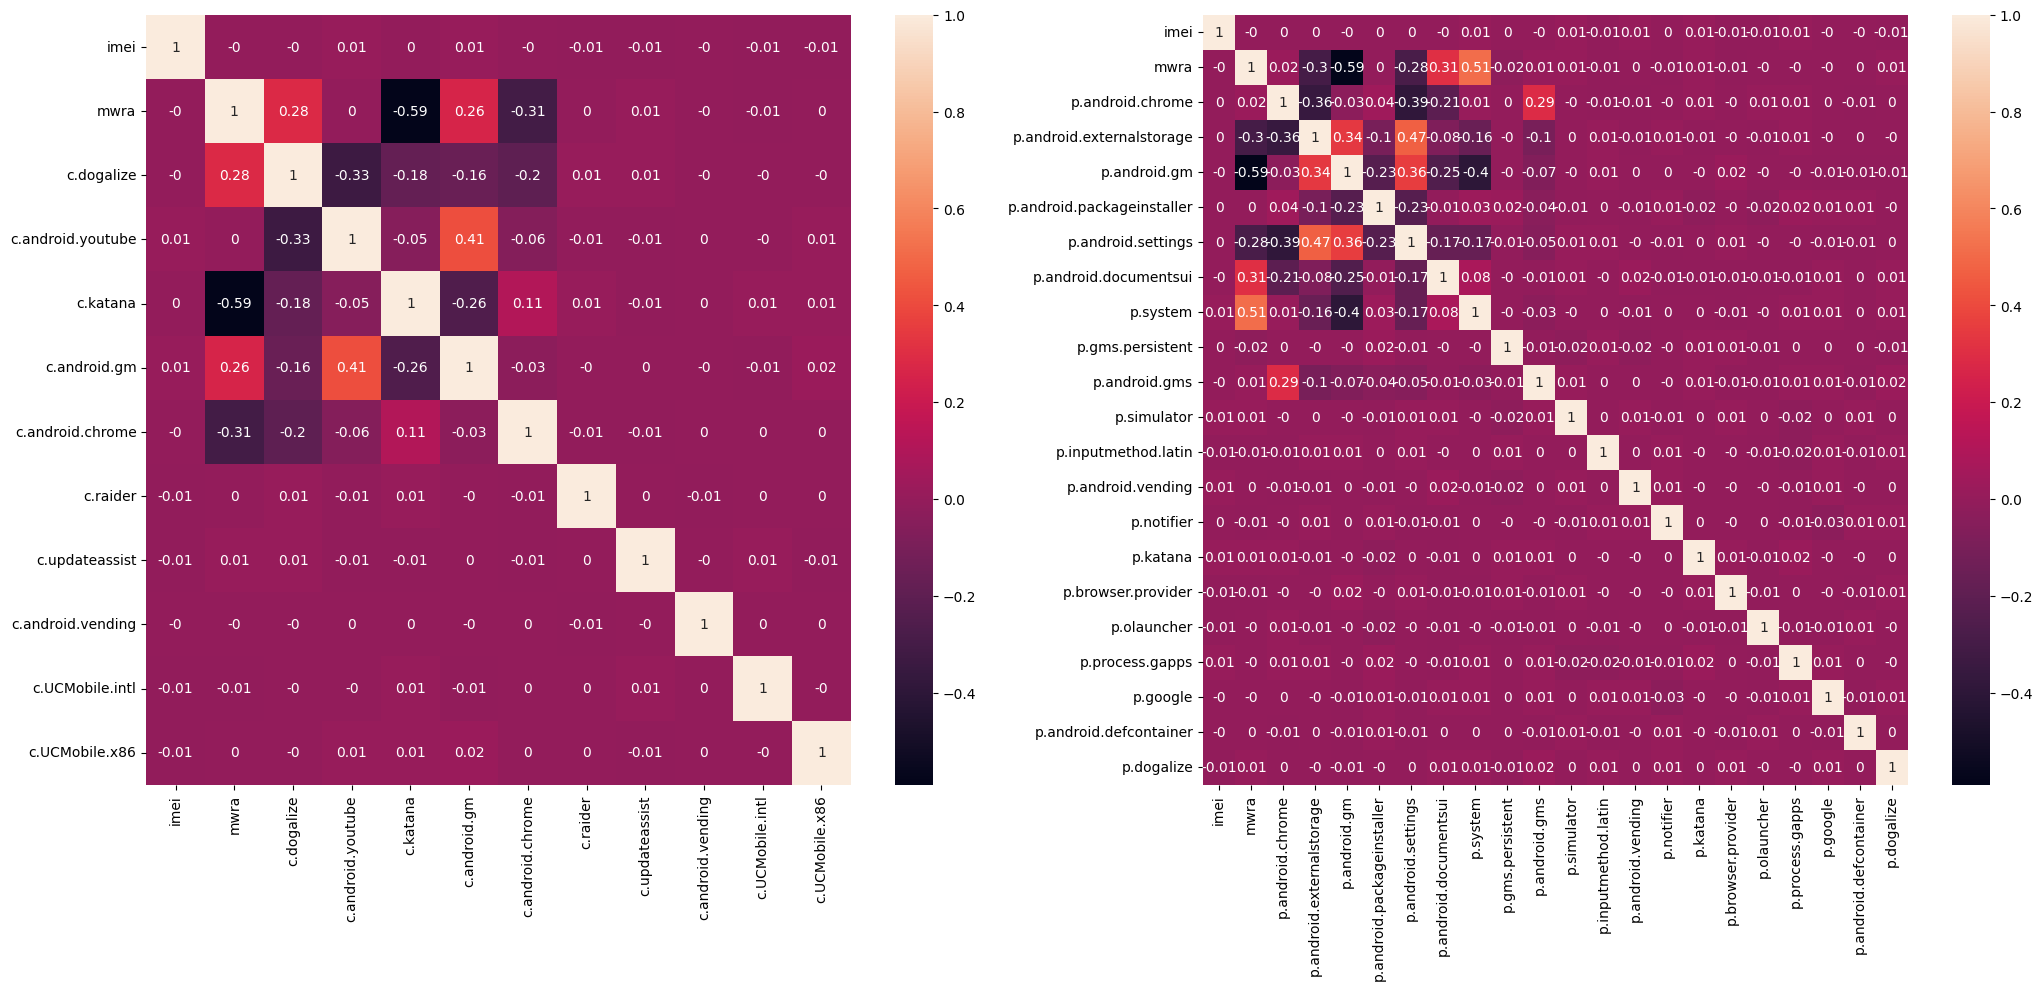

In [391]:

plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.heatmap(df_connections.iloc[:,1:].corr().round(decimals=2),annot=True)
plt.subplot(1,2,2)
sns.heatmap(df_processes.iloc[:,1:].corr().round(decimals=2),annot=True)


lota pppl ddt disclose residence uwu (im really not sure tf am i supposed to do here, I'd much rather theey give me input and ouput)
(cancelled . #important attribute #1 residence ,#2  job -> new important attributes are mwra)

In [392]:
unemployed_count=df_profiles[df_profiles['job'].isnull() &df_profiles['residence'].isnull()].shape[0]
employed_count=df_profiles[df_profiles['job'].notnull() &df_profiles['residence'].isnull()].shape[0]
print("Number of users without jobs and without resudenci : "+str(unemployed_count))

Number of users without jobs and without resudenci : 1164


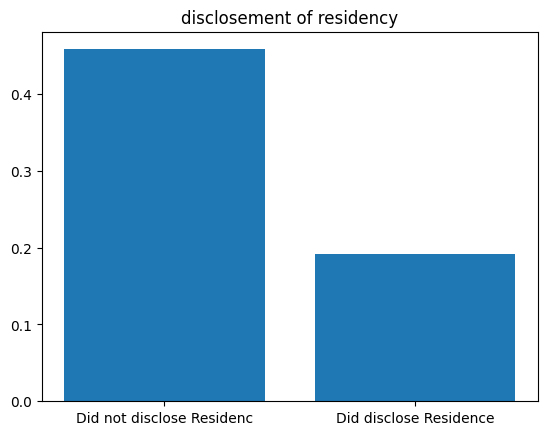

In [393]:

plt.bar(["Did not disclose Residenc","Did disclose Residence"],[unemployed_count/df_profiles.shape[0],employed_count/df_profiles.shape[0]])
plt.title("disclosement of residency")
plt.show()

#important attributes 4,5,6,7,8: +important attribute mwra

In [394]:
df_connections[df_connections.columns[3:8]].describe()

,c.dogalize,c.android.youtube,c.katana,c.android.gm,c.android.chrome
count,15137.000000,15137.000000,15137.000000,15137.000000,15137.000000
mean,12.146999,12.753355,12.211598,12.110331,11.558837
std,2.611902,2.687805,2.428661,2.756741,2.371507
min,2.568060,2.890720,2.437420,2.366610,0.000000
25%,10.289360,10.828360,10.427670,10.177220,9.918350
50%,12.044410,12.873060,12.004980,11.933450,11.414800
75%,13.990380,14.730570,14.010600,13.911510,13.112600
max,21.997370,21.469580,22.510050,22.667660,20.538700


array([[<Axes: title={'center': 'c.dogalize'}>,
        <Axes: title={'center': 'c.android.youtube'}>],
       [<Axes: title={'center': 'c.katana'}>,
        <Axes: title={'center': 'c.android.gm'}>],
       [<Axes: title={'center': 'c.android.chrome'}>, <Axes: >]],
      dtype=object)

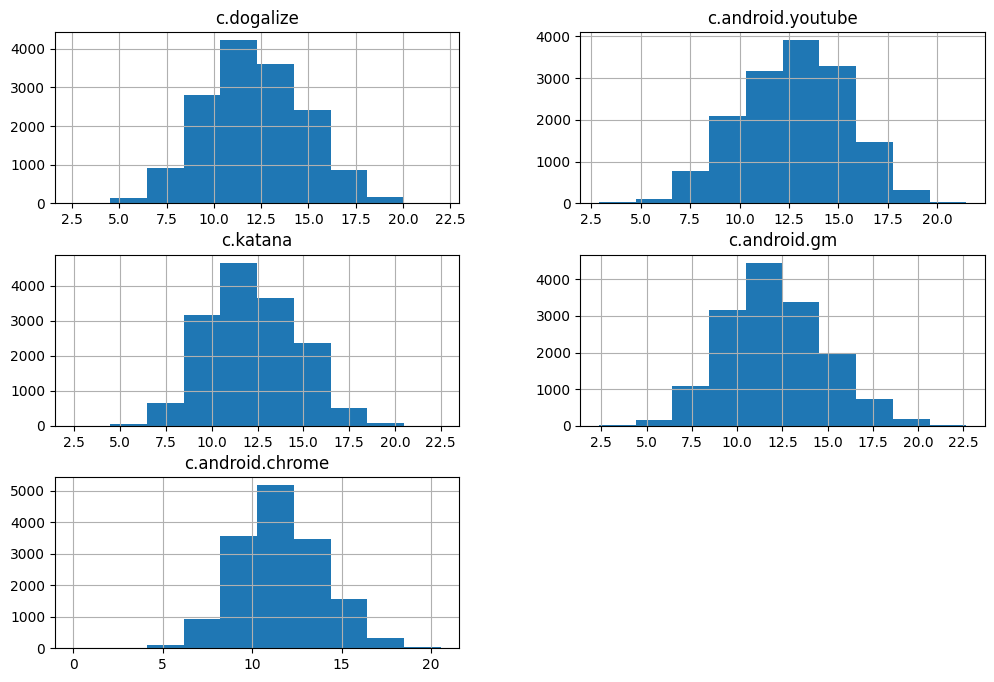

In [395]:
df_connections.hist(column=df_connections.columns[3:8],figsize=(12,8))

#important attributes 10 11 12

In [396]:
df_processes[['p.android.gm','p.android.settings','p.system','p.android.externalstorage','p.android.documentsui']].describe()

,p.android.gm,p.android.settings,p.system,p.android.externalstorage,p.android.documentsui
count,15137.000000,15137.000000,15137.000000,15137.000000,15137.000000
mean,12.220034,13.360130,13.300370,13.391808,13.911304
std,2.417076,2.621851,2.773015,2.473211,2.471777
min,3.492160,2.936040,2.605000,2.668370,5.614740
25%,10.462840,11.692900,11.333590,11.797590,12.218870
50%,11.990460,13.660240,13.335930,13.677020,14.006660
75%,13.935790,15.212220,15.291500,15.170730,15.619300
max,21.005110,21.756040,23.130130,23.066440,23.274340


array([[<Axes: title={'center': 'p.android.gm'}>,
        <Axes: title={'center': 'p.android.settings'}>],
       [<Axes: title={'center': 'p.system'}>,
        <Axes: title={'center': 'p.android.externalstorage'}>],
       [<Axes: title={'center': 'p.android.documentsui'}>, <Axes: >]],
      dtype=object)

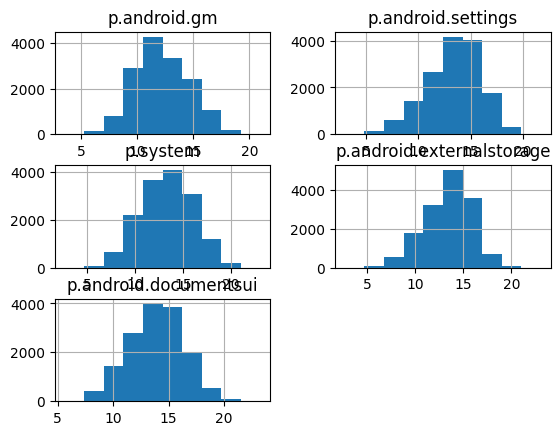

In [397]:
df_processes.hist(column=['p.android.gm','p.android.settings','p.system','p.android.externalstorage','p.android.documentsui'])

In [398]:
df_processes.head()


,ts,imei,mwra,p.android.chrome,p.android.externalstorage,p.android.gm,p.android.packageinstaller,p.android.settings,p.android.documentsui,p.system,...,p.inputmethod.latin,p.android.vending,p.notifier,p.katana,p.browser.provider,p.olauncher,p.process.gapps,p.google,p.android.defcontainer,p.dogalize
0,2018-05-05 10:00:00,359043379931766817,0.0,12.67131,11.51584,11.14770,16.65822,10.34567,13.85827,14.24441,...,67.41099,43.41425,76.85292,61.49504,83.84273,90.26474,64.52255,58.33299,53.62833,71.56538
1,2018-05-05 10:01:00,8630330696303481313,1.0,14.37083,10.40542,9.51907,16.41548,8.97598,13.02322,16.31514,...,63.46175,41.06191,96.50752,90.91460,28.28500,8.85422,51.89787,15.59966,73.88848,8.64346
2,2018-05-05 10:02:00,8630330696303482485,1.0,15.29793,11.57740,13.15840,11.13504,12.78871,15.33671,18.05368,...,61.37235,41.14340,14.49331,74.73880,4.18073,6.10243,44.94162,60.25186,74.62467,43.83823
3,2018-05-05 10:03:00,8630330696303481628,0.0,17.46341,11.75419,11.61736,12.61226,9.20242,11.43078,9.84154,...,43.42172,49.29721,21.64738,71.05116,62.98376,44.42369,51.61388,13.60374,19.42437,1.84968
4,2018-05-05 10:04:00,359043379931766957,0.0,10.87997,12.62410,13.19246,13.77152,15.48980,14.81432,14.67672,...,48.06657,70.43036,90.86824,42.66690,60.74888,50.69262,24.46560,70.89736,46.68829,36.31749


1.1 C

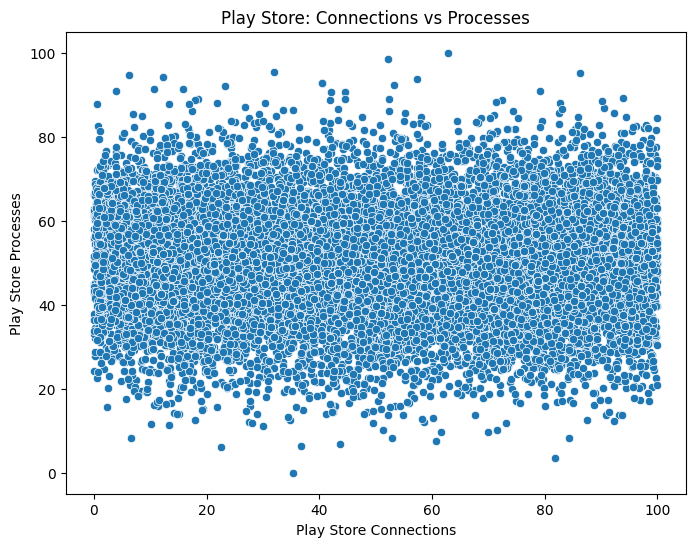

Correlation between Play Store Connections and Processes: -0.009170443716403373


In [399]:
df_con_pro = pd.merge(df_connections, df_processes, on=['imei', 'ts'], how='inner')

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_con_pro['c.android.vending'], y=df_con_pro['p.android.vending'])
plt.title('Play Store: Connections vs Processes')
plt.xlabel('Play Store Connections')
plt.ylabel('Play Store Processes')
plt.show()

play_store_corr = df_con_pro['c.android.vending'].corr(df_con_pro['p.android.vending'], method='pearson')
print(f'Correlation between Play Store Connections and Processes: {play_store_corr}')

In [400]:
chrome_corr = df_con_pro['c.android.chrome'].corr(df_con_pro['p.android.chrome'], method='pearson')
print(f'Correlation between Chrome Connections and Chrome Processes: {chrome_corr}')

Correlation between Chrome Connections and Chrome Processes: -0.2197277738550875


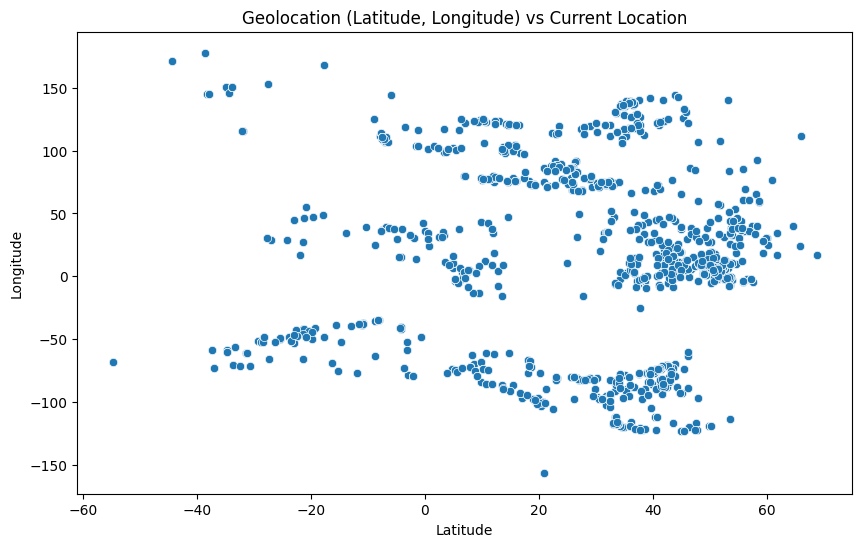

In [401]:
merged_profiles_devices = pd.merge(df_profiles, df_devices, on='imei', how='inner')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_profiles_devices['latitude'], y=merged_profiles_devices['longitude'])
plt.title('Geolocation (Latitude, Longitude) vs Current Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

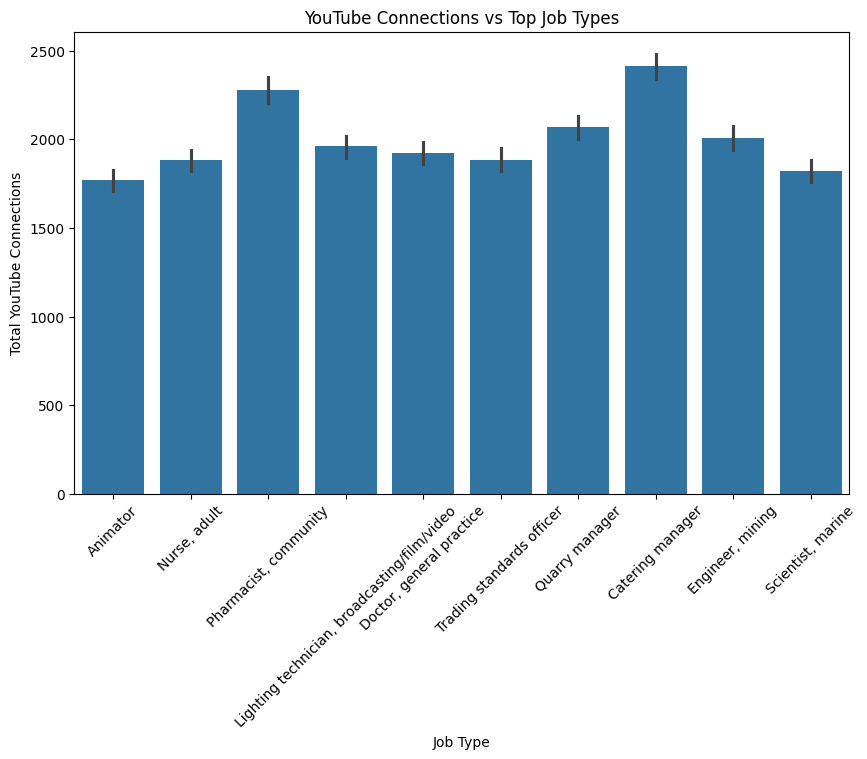

In [402]:
merged_profiles_connections = pd.merge(df_profiles, df_connections, on='imei', how='inner')

top_jobs = merged_profiles_connections.groupby('job')['c.android.youtube'].sum().nlargest(10).index

top_job_data = merged_profiles_connections[merged_profiles_connections['job'].isin(top_jobs)]

plt.figure(figsize=(10, 6))
sns.barplot(x='job', y='c.android.youtube', data=top_job_data, estimator=sum)
plt.title('YouTube Connections vs Top Job Types')
plt.xlabel('Job Type')
plt.ylabel('Total YouTube Connections')
plt.xticks(rotation=45)
plt.show()

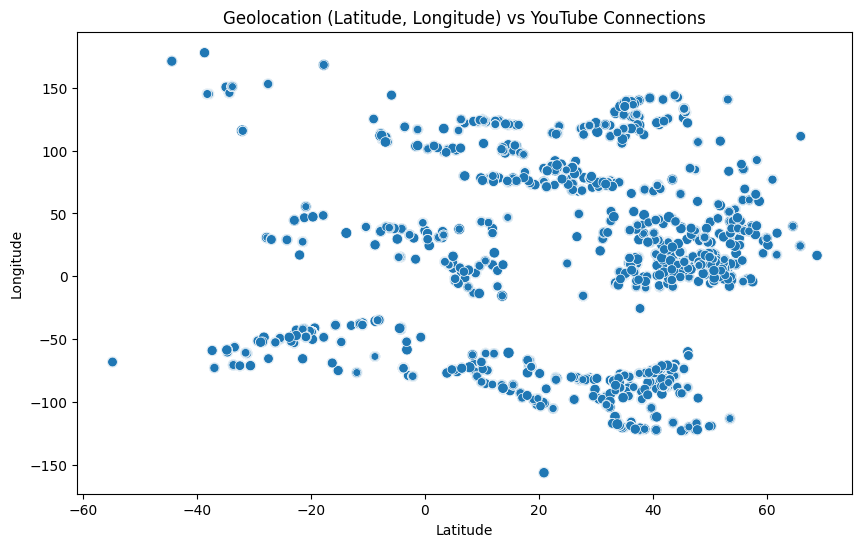

In [403]:
merged_connections_devices = pd.merge(df_connections, df_devices, on='imei', how='inner')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_connections_devices['latitude'], y=merged_connections_devices['longitude'], size=merged_connections_devices['c.android.youtube'], legend=False)
plt.title('Geolocation (Latitude, Longitude) vs YouTube Connections')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

<a id="section4"></a> 1.1 D

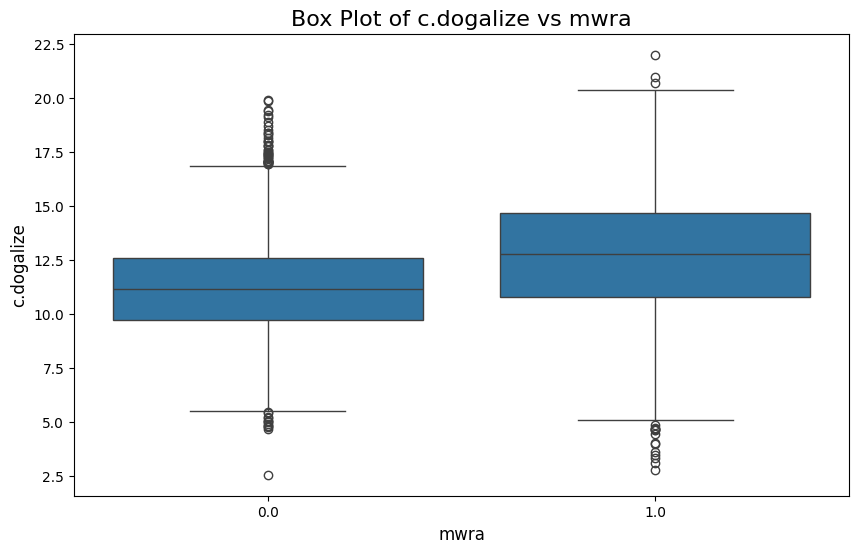

T-statistic: -35.770977903342484, P-value: 4.313207181404798e-269


In [404]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mwra', y='c.dogalize', data=df_connections)

plt.title('Box Plot of c.dogalize vs mwra', fontsize=16)
plt.xlabel('mwra', fontsize=12)
plt.ylabel('c.dogalize', fontsize=12)

plt.show()

group1 = df_connections[df_connections['mwra'] == 0]['c.dogalize']
group2 = df_connections[df_connections['mwra'] == 1]['c.dogalize']
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


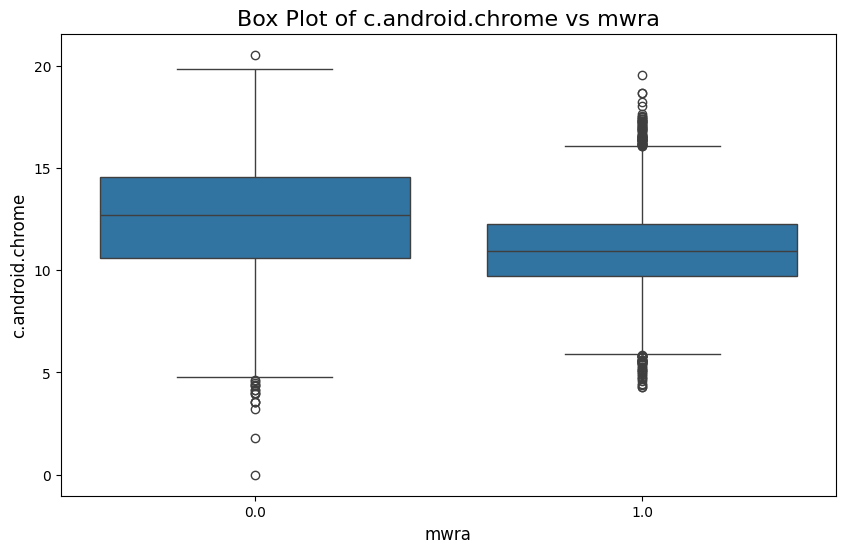

T-statistic: 40.73559524318752, P-value: 0.0


In [405]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mwra', y='c.android.chrome', data=df_connections)

plt.title('Box Plot of c.android.chrome vs mwra', fontsize=16)
plt.xlabel('mwra', fontsize=12)
plt.ylabel('c.android.chrome', fontsize=12)

plt.show()

group1 = df_connections[df_connections['mwra'] == 0]['c.android.chrome']
group2 = df_connections[df_connections['mwra'] == 1]['c.android.chrome']
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

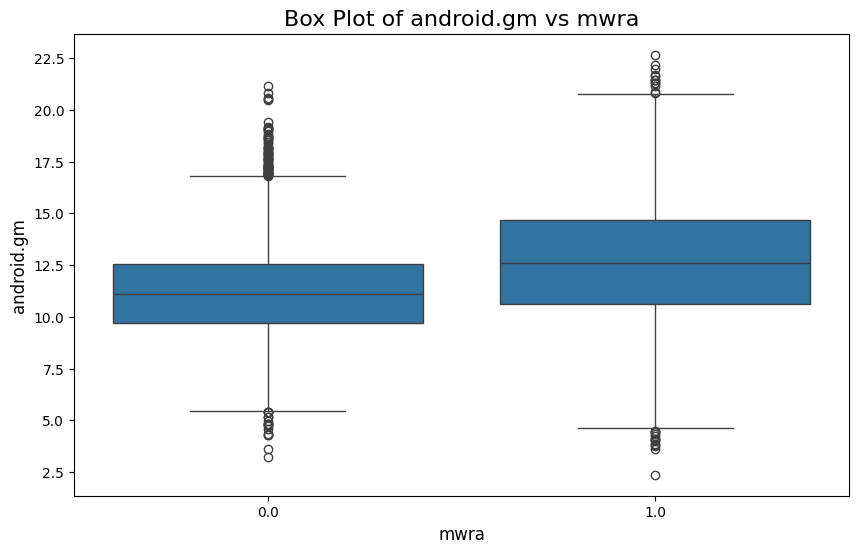

T-statistic: -32.79850369126001, P-value: 5.42277842024909e-228


In [406]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mwra', y='c.android.gm', data=df_connections)

plt.title('Box Plot of android.gm vs mwra', fontsize=16)
plt.xlabel('mwra', fontsize=12)
plt.ylabel('android.gm', fontsize=12)

plt.show()

group1 = df_connections[df_connections['mwra'] == 0]['c.android.gm']
group2 = df_connections[df_connections['mwra'] == 1]['c.android.gm']
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

Hypothesis 1

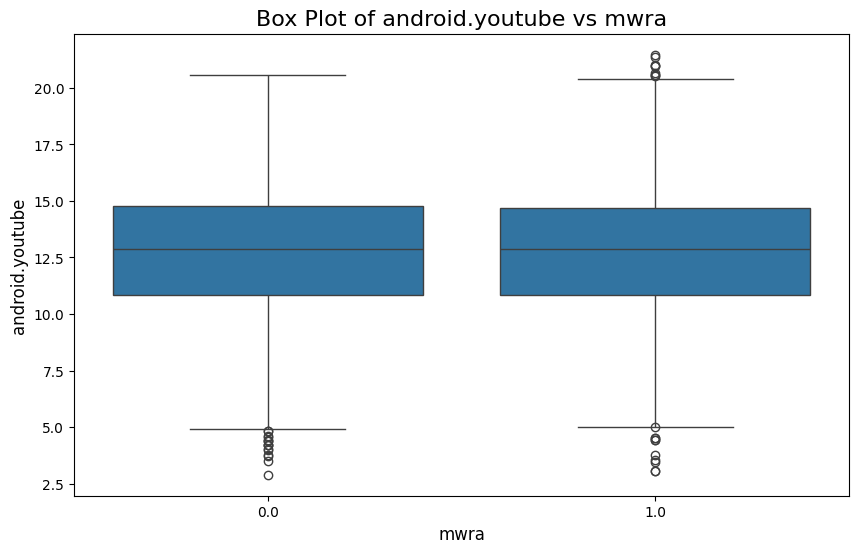

T-statistic: -0.1648860551426131, P-value: 0.8690358705819591


In [407]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mwra', y='c.android.youtube', data=df_connections)

plt.title('Box Plot of android.youtube vs mwra', fontsize=16)
plt.xlabel('mwra', fontsize=12)
plt.ylabel('android.youtube', fontsize=12)

plt.show()

group1 = df_connections[df_connections['mwra'] == 0]['c.android.youtube']
group2 = df_connections[df_connections['mwra'] == 1]['c.android.youtube']
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

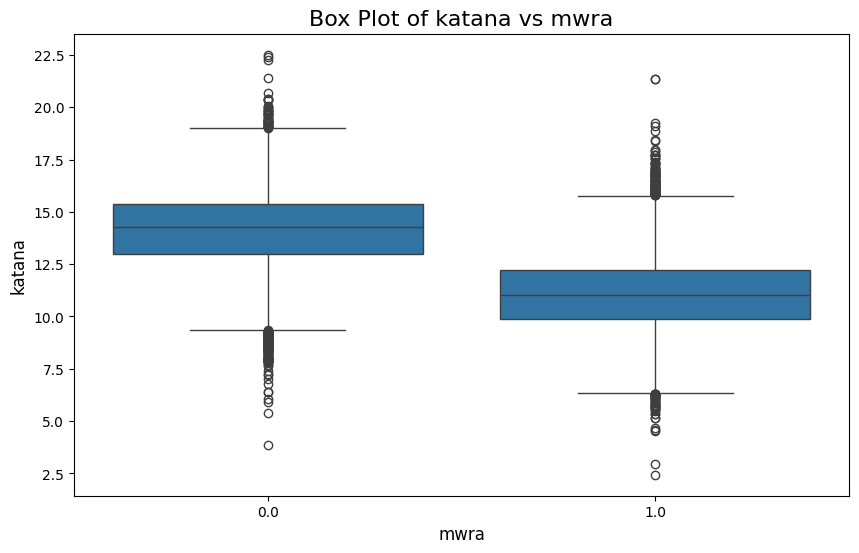

T-statistic: 90.61665699876752, P-value: 0.0


In [408]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mwra', y='c.katana', data=df_connections)

plt.title('Box Plot of katana vs mwra', fontsize=16)
plt.xlabel('mwra', fontsize=12)
plt.ylabel('katana', fontsize=12)

plt.show()

group1 = df_connections[df_connections['mwra'] == 0]['c.katana']
group2 = df_connections[df_connections['mwra'] == 1]['c.katana']
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

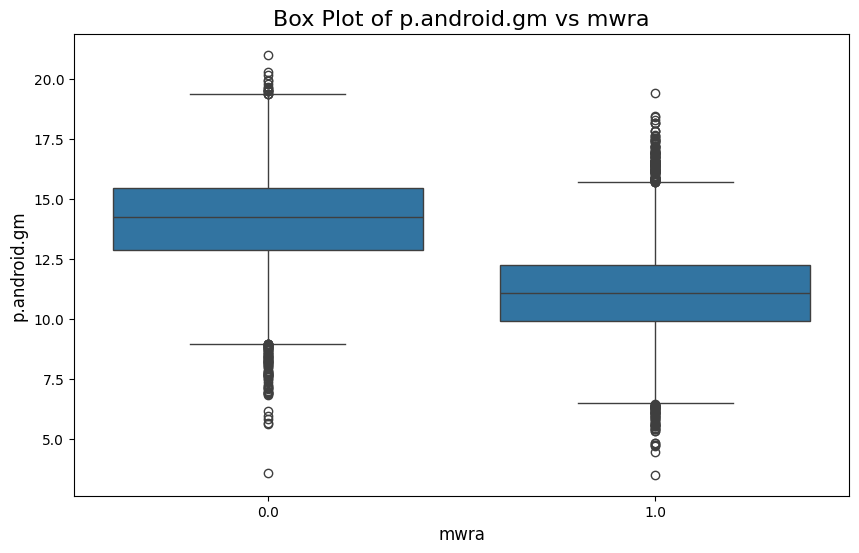

T-statistic: 90.41404061522609, P-value: 0.0


In [409]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mwra', y='p.android.gm', data=df_processes)

plt.title('Box Plot of p.android.gm vs mwra', fontsize=16)
plt.xlabel('mwra', fontsize=12)
plt.ylabel('p.android.gm', fontsize=12)

plt.show()

group1 = df_processes[df_processes['mwra'] == 0]['p.android.gm']
group2 = df_processes[df_processes['mwra'] == 1]['p.android.gm']
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

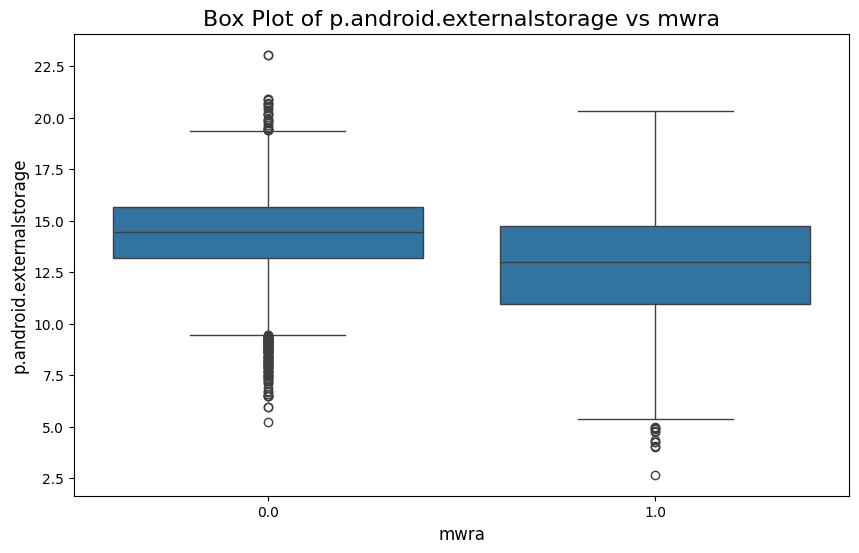

T-statistic: 37.98981838751341, P-value: 1.0102983519186332e-301


In [410]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mwra', y='p.android.externalstorage', data=df_processes)

plt.title('Box Plot of p.android.externalstorage vs mwra', fontsize=16)
plt.xlabel('mwra', fontsize=12)
plt.ylabel('p.android.externalstorage', fontsize=12)

plt.show()

group1 = df_processes[df_processes['mwra'] == 0]['p.android.externalstorage']
group2 = df_processes[df_processes['mwra'] == 1]['p.android.externalstorage']
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

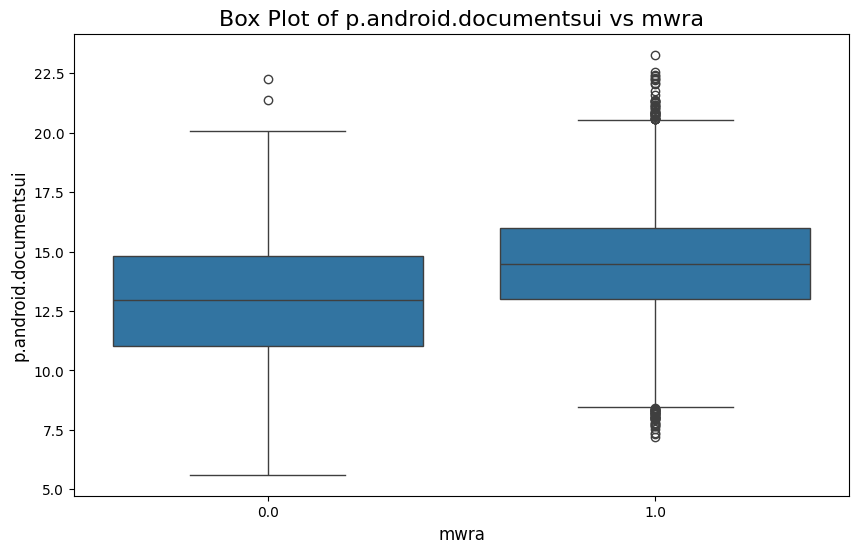

T-statistic: -39.42305688518544, P-value: 0.0


In [411]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mwra', y='p.android.documentsui', data=df_processes)

plt.title('Box Plot of p.android.documentsui vs mwra', fontsize=16)
plt.xlabel('mwra', fontsize=12)
plt.ylabel('p.android.documentsui', fontsize=12)

plt.show()

group1 = df_processes[df_processes['mwra'] == 0]['p.android.documentsui']
group2 = df_processes[df_processes['mwra'] == 1]['p.android.documentsui']
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

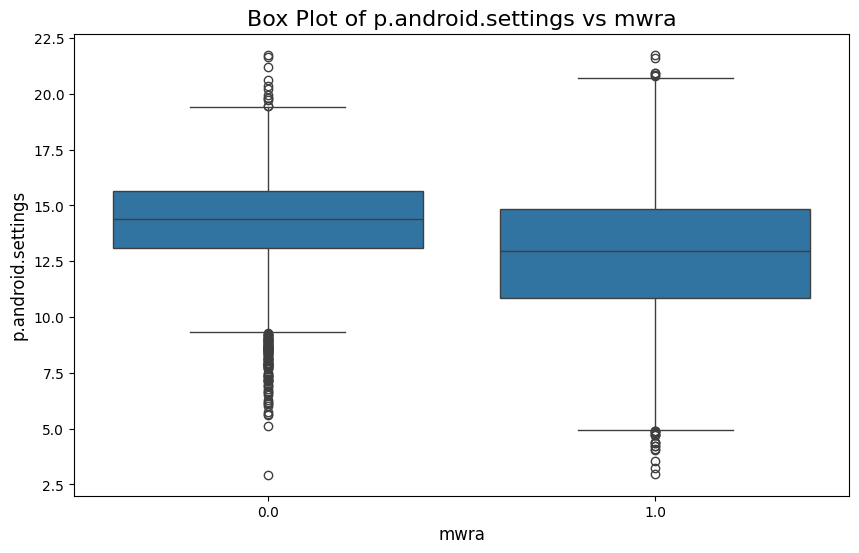

T-statistic: 35.25941205831529, P-value: 8.39396720270154e-262


In [412]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mwra', y='p.android.settings', data=df_processes)

plt.title('Box Plot of p.android.settings vs mwra', fontsize=16)
plt.xlabel('mwra', fontsize=12)
plt.ylabel('p.android.settings', fontsize=12)

plt.show()

group1 = df_processes[df_processes['mwra'] == 0]['p.android.settings']
group2 = df_processes[df_processes['mwra'] == 1]['p.android.settings']
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

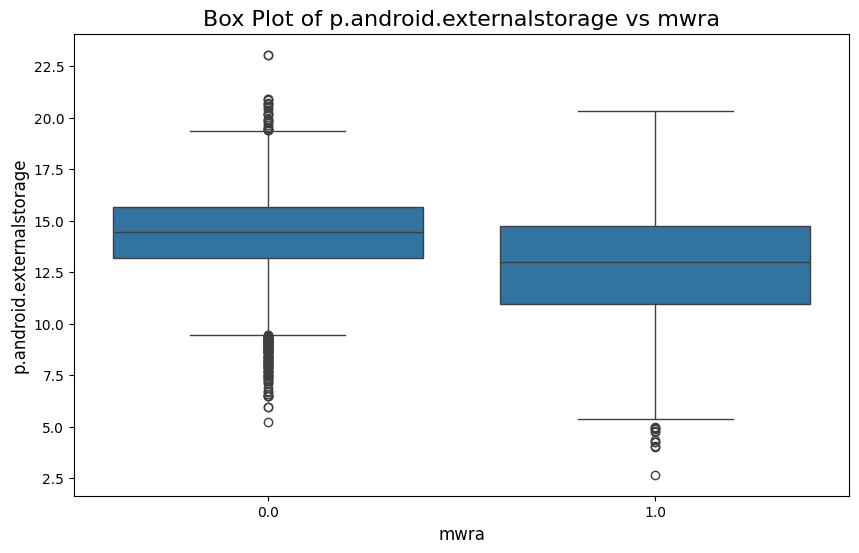

T-statistic: 37.98981838751341, P-value: 1.0102983519186332e-301


In [413]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mwra', y='p.android.externalstorage', data=df_processes)

plt.title('Box Plot of p.android.externalstorage vs mwra', fontsize=16)
plt.xlabel('mwra', fontsize=12)
plt.ylabel('p.android.externalstorage', fontsize=12)

plt.show()
group1 = df_processes[df_processes['mwra'] == 0]['p.android.externalstorage']
group2 = df_processes[df_processes['mwra'] == 1]['p.android.externalstorage']
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

Hypothesis 2

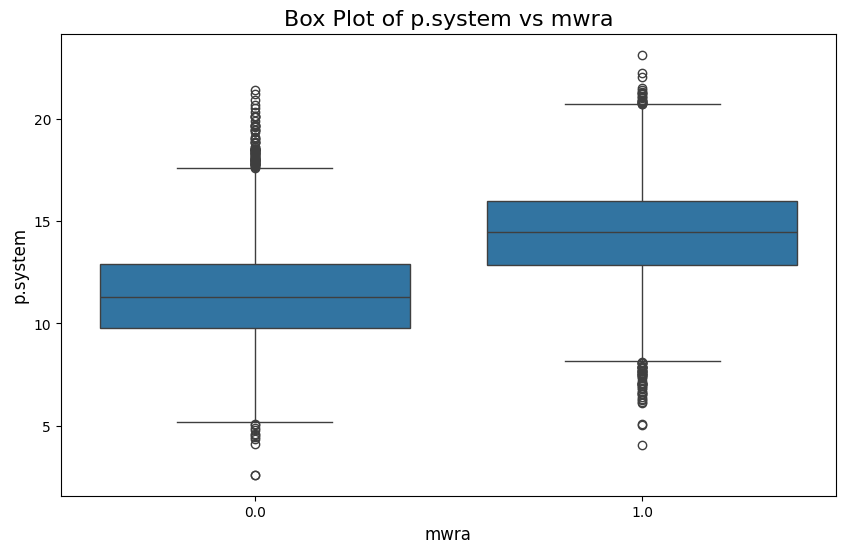

T-statistic: -73.32040936466328, P-value: 0.0


In [414]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mwra', y='p.system', data=df_processes)

plt.title('Box Plot of p.system vs mwra', fontsize=16)
plt.xlabel('mwra', fontsize=12)
plt.ylabel('p.system', fontsize=12)

plt.show()
group1 = df_processes[df_processes['mwra'] == 0]['p.system']
group2 = df_processes[df_processes['mwra'] == 1]['p.system']
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

1.1.E<br><br>
It seems certain variables are indeed dependant on others, for example c.android.youtube seems dependant on latitude/longitude. <br><br>Our predective variable seems dependant on these variables:<br> 'p.android.gm','p.android.settings','p.system','p.android.externalstorage','p.android.documentsui' a v df_connections c.dogalize','c.android.youtube','c.katana','c.android.gm','c.android.chrome'
<br><br>
it seems permanently combining datasets is unnecessary for now.

1.2.A úprava dát

In [415]:
df_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company           2542 non-null   object
 1   imei              2542 non-null   int64 
 2   name              2542 non-null   object
 3   ssn               2542 non-null   object
 4   registration      2542 non-null   object
 5   job               763 non-null    object
 6   current_location  2415 non-null   object
 7   username          2542 non-null   object
 8   user_id           2542 non-null   int64 
 9   mail              2542 non-null   object
 10  residence         890 non-null    object
 11  birthdate         1398 non-null   object
dtypes: int64(2), object(10)
memory usage: 238.4+ KB


output of the above suggests that registration and birthdate are not correctly formated so we will fix that (we use datetime because its the most suitable format for further data manipulation)

In [416]:
df_profiles['registration']=pd.to_datetime(df_profiles['registration'],format="mixed")
df_profiles['birthdate']=pd.to_datetime(df_profiles['birthdate'])
df_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   company           2542 non-null   object        
 1   imei              2542 non-null   int64         
 2   name              2542 non-null   object        
 3   ssn               2542 non-null   object        
 4   registration      2542 non-null   datetime64[ns]
 5   job               763 non-null    object        
 6   current_location  2415 non-null   object        
 7   username          2542 non-null   object        
 8   user_id           2542 non-null   int64         
 9   mail              2542 non-null   object        
 10  residence         890 non-null    object        
 11  birthdate         1398 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 238.4+ KB


same problem can be spotted here hence we can use the same solution

In [417]:
df_connections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15137 entries, 0 to 15136
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15137 non-null  object 
 1   imei               15137 non-null  int64  
 2   mwra               15137 non-null  float64
 3   c.dogalize         15137 non-null  float64
 4   c.android.youtube  15137 non-null  float64
 5   c.katana           15137 non-null  float64
 6   c.android.gm       15137 non-null  float64
 7   c.android.chrome   15137 non-null  float64
 8   c.raider           15137 non-null  float64
 9   c.updateassist     15137 non-null  float64
 10  c.android.vending  15137 non-null  float64
 11  c.UCMobile.intl    15137 non-null  float64
 12  c.UCMobile.x86     15137 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


same for this shit

In [418]:
df_connections['ts']=pd.to_datetime(df_connections['ts'])
df_connections.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15137 entries, 0 to 15136
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ts                 15137 non-null  datetime64[ns]
 1   imei               15137 non-null  int64         
 2   mwra               15137 non-null  float64       
 3   c.dogalize         15137 non-null  float64       
 4   c.android.youtube  15137 non-null  float64       
 5   c.katana           15137 non-null  float64       
 6   c.android.gm       15137 non-null  float64       
 7   c.android.chrome   15137 non-null  float64       
 8   c.raider           15137 non-null  float64       
 9   c.updateassist     15137 non-null  float64       
 10  c.android.vending  15137 non-null  float64       
 11  c.UCMobile.intl    15137 non-null  float64       
 12  c.UCMobile.x86     15137 non-null  float64       
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 1.5

final change of format 

In [419]:
df_processes['ts']=pd.to_datetime(df_processes['ts'])
df_processes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15137 entries, 0 to 15136
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ts                          15137 non-null  datetime64[ns]
 1   imei                        15137 non-null  int64         
 2   mwra                        15137 non-null  float64       
 3   p.android.chrome            15137 non-null  float64       
 4   p.android.externalstorage   15137 non-null  float64       
 5   p.android.gm                15137 non-null  float64       
 6   p.android.packageinstaller  15137 non-null  float64       
 7   p.android.settings          15137 non-null  float64       
 8   p.android.documentsui       15137 non-null  float64       
 9   p.system                    15137 non-null  float64       
 10  p.gms.persistent            15137 non-null  float64       
 11  p.android.gms               15137 non-null  float64   

In [420]:
def duplicate_count(df):
    return [df[i][df[i].duplicated()].shape[0] for i in range(len(df))]
    

print("počet duplikátov: connections: {} ; processes: {} ; profiles: {} ; devices: {}".format(*duplicate_count([df_connections,df_processes,df_profiles,df_devices])))


počet duplikátov: connections: 179 ; processes: 179 ; profiles: 0 ; devices: 8


In [421]:
df_connections.drop_duplicates(inplace=True)
df_processes.drop_duplicates(inplace=True)

print("počet duplikátov: connections: {} ; processes: {} ".format(*duplicate_count([df_connections,df_processes])))

počet duplikátov: connections: 0 ; processes: 0 


In [422]:
def null_count(dfs):

    return [df[df[df.columns].isnull().any(axis=1)].shape[0] for df in dfs]
print("počet null values: connections: {} ; processes: {} ; profiles: {} ; devices: {}".format(*null_count([df_connections,df_processes,df_profiles,df_devices])),)


počet null values: connections: 0 ; processes: 0 ; profiles: 2417 ; devices: 1


1.2.B

In [423]:
def check_nan_values(df):
    for column in df.columns:
        print(column,": ",df[df[column].isnull()].shape[0])
    print("total number of columns in profiles df : "+str(df.shape[0]))
check_nan_values(df_profiles)

company :  0
imei :  0
name :  0
ssn :  0
registration :  0
job :  1779
current_location :  127
username :  0
user_id :  0
mail :  0
residence :  1652
birthdate :  1144
total number of columns in profiles df : 2542


getting rid of nan values method 1 : fillna with mean (not the most optimal solution since putting in mean of BIRTHDATE is kinda dum for many reasons but its one of the tasks so ig we doin it)

In [424]:
df_profiles['birthdate']=df_profiles['birthdate'].fillna(df_profiles['birthdate'].mean())
df_profiles['birthdate'].isnull().shape[0]
df_profiles.head()

,company,imei,name,ssn,registration,job,current_location,username,user_id,mail,residence,birthdate
0,Beck-Wright,863033069630348784,Gregory Santiago,493-70-5760,2023-05-04,NaN,"(Decimal('-10.6042995'), Decimal('-73.662677'))",zacharyclayton,474,xraymond@hotmail.com,NaN,1967-09-17 09:20:20.600858368
1,"Phillips, Dixon and Garrett",3590433799317661115,Tom Fisher,598-97-2312,2020-05-09,NaN,"(Decimal('-48.1319165'), Decimal('176.559852'))",dustin49,1307,kevin90@hotmail.com,39281 Brianna Pines Suite 226\r\nMatthewcheste...,1967-09-17 09:20:20.600858368
2,Manning LLC,863033069630348826,Howard Garcia,383-26-6902,2021-08-21,Animator,"(Decimal('44.7109925'), Decimal('-20.066520'))",davidstone,2255,holmestommy@yahoo.com,NaN,1967-09-17 09:20:20.600858368
3,"Duarte, Campbell and Escobar",863033069630348263,Andrew Montoya,556-81-7215,2023-03-12,NaN,"(Decimal('30.7550255'), Decimal('81.033571'))",juliehayes,1319,john38@gmail.com,"39662 Kenneth Locks Apt. 893\r\nNew Thomaston,...",1967-09-17 09:20:20.600858368
4,Mcclure-Lutz,863033069630348131,Kelly Holder,213-99-5419,2019-11-10,Textile designer,"(Decimal('-45.403474'), Decimal('120.541529'))",donna35,1883,rebecca75@gmail.com,NaN,1967-09-17 09:20:20.600858368


we drop every every column with null values current locatio because its tied to specific number,job because there are too many nan values and residene because there are too many nan values

In [425]:
for column in df_profiles.columns:
    if df_profiles[df_profiles[column].isnull()].shape[0]:
        df_profiles.drop([column],axis=1,inplace=True)
        print("dropped column : "+column)
print("new table:")
check_nan_values(df_profiles)

dropped column : job
dropped column : current_location
dropped column : residence
new table:
company :  0
imei :  0
name :  0
ssn :  0
registration :  0
username :  0
user_id :  0
mail :  0
birthdate :  0
total number of columns in profiles df : 2542


as we saw before there is a single missing value in df_devices so we first display it to see if we can somehow replace it

In [426]:
print(df_devices.shape[0])
#df_devices.dropna(inplace=True)
df_devices.drop_duplicates(inplace=True,keep="first")
print(df_devices[df_devices.isna().any(axis=1)])
df_devices.head()


2958
      latitude  longitude store_name code         location  \
1391 -21.98333   16.91667  Okahandja  NaN  Africa/Windhoek   

                     imei  
1391  8630330696303481628  


,latitude,longitude,store_name,code,location,imei
0,-11.48472,-37.93278,Rio Real,BR,America/Bahia,863033069630348404
1,14.62072,74.83554,Sirsi,IN,Asia/Kolkata,8630330696303481412
2,54.84444,38.16694,Kashira,RU,Europe/Moscow,8630330696303481586
3,42.42510,-71.06616,Malden,US,America/New_York,3590433799317661503
4,37.17590,128.98890,T‚Äôaebaek,KR,Asia/Seoul,3590433799317661016


we display all rows with same location 

In [427]:
df_devices[df_devices['location']=='Africa/Windhoek']

,latitude,longitude,store_name,code,location,imei
1391,-21.98333,16.91667,Okahandja,NaN,Africa/Windhoek,8630330696303481628


since there is only one entry with this location we cant copy the location from some other df hence we have to delete it 1.b.2

In [428]:

df_devices.dropna(inplace=True)
df_devices.shape[0]
df_connections.head()

,ts,imei,mwra,c.dogalize,c.android.youtube,c.katana,c.android.gm,c.android.chrome,c.raider,c.updateassist,c.android.vending,c.UCMobile.intl,c.UCMobile.x86
0,2018-05-05 10:00:00,359043379931766817,0.0,14.86100,11.58414,12.03004,10.27425,10.91841,38.44506,80.02544,26.10909,67.13184,93.30543
1,2018-05-05 10:01:00,8630330696303481313,1.0,14.83612,12.34182,11.04896,9.89308,11.44850,53.51368,16.38711,63.61596,53.85173,98.59528
2,2018-05-05 10:02:00,8630330696303482485,1.0,16.72953,12.50429,10.10484,16.81150,11.10686,44.37810,80.51528,79.91808,41.15915,86.40680
3,2018-05-05 10:03:00,8630330696303481628,0.0,8.01110,14.99371,14.78679,11.08389,6.38690,33.49077,20.93570,45.73413,93.57377,13.77874
4,2018-05-05 10:04:00,359043379931766957,0.0,11.61620,12.77182,10.49031,12.13535,13.94101,61.36395,25.23605,2.93423,92.11111,44.58123


1.2.C 1: odstranenie outlieru pomocou vymazania pozorovani

(array([  69.,  335., 1361., 2912., 3325., 2611., 2410., 1361.,  424.,
         116.]),
 array([ 5.12747 ,  6.553237,  7.979004,  9.404771, 10.830538, 12.256305,
        13.682072, 15.107839, 16.533606, 17.959373, 19.38514 ]),
 <BarContainer object of 10 artists>)

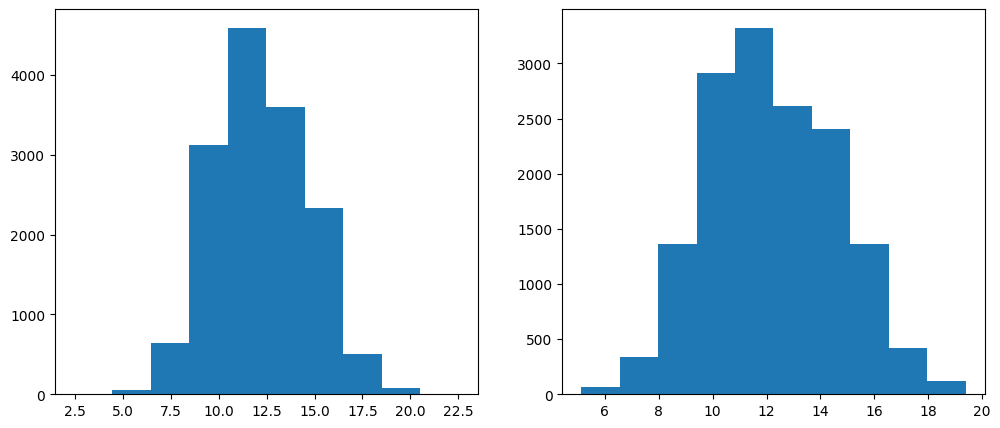

In [429]:
plt.figure(figsize=(12,5))
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return (a > upper) | (a < lower)
plt.subplot(1,2,1)
plt.hist(df_connections['c.katana'])
outlier = identify_outliers(df_connections['c.katana'])
df_connections.loc[outlier, 'c.katana'] = np.nan
plt.subplot(1,2,2)
plt.hist(df_connections['c.katana'])

1.2.C 2:odstranenie outlieru pomocou zmenenia okrajovych hodnuot na ich hranicu (0.95 kvantil alebo 0.05)

(array([  83.,  368., 1242., 2855., 3363., 2741., 2079., 1462.,  623.,
         142.]),
 array([ 5.30157 ,  6.681402,  8.061234,  9.441066, 10.820898, 12.20073 ,
        13.580562, 14.960394, 16.340226, 17.720058, 19.09989 ]),
 <BarContainer object of 10 artists>)

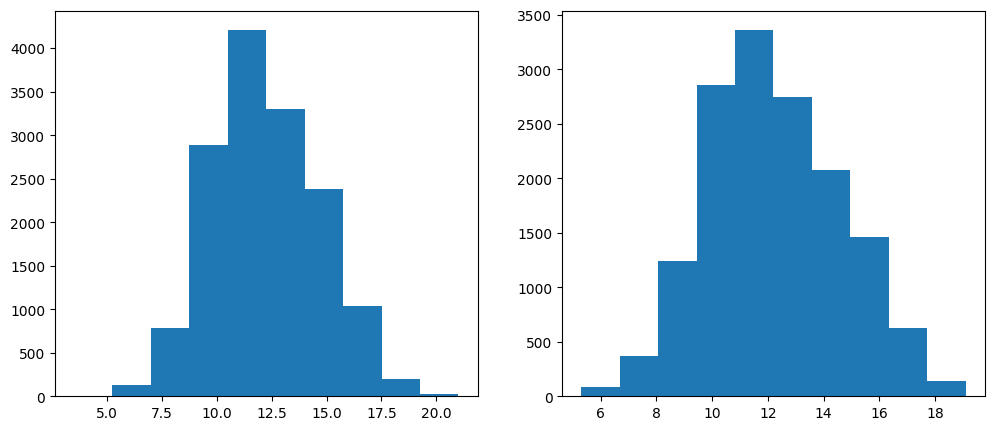

In [430]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df_processes['p.android.gm'])

outlier_mask = identify_outliers(df_processes['p.android.gm'])
lower_bound = df_processes['p.android.gm'].quantile(0.05)
upper_bound = df_processes['p.android.gm'].quantile(0.95)
df_processes.loc[outlier_mask, 'p.android.gm'] = np.where(
    df_processes.loc[outlier_mask, 'p.android.gm'] < lower_bound,
    lower_bound,
    upper_bound
)
plt.subplot(1,2,2)
plt.hist(df_processes['p.android.gm'])


1.3 A

Hypothesis 1: Malware-related activity (mwra) is influenced by connections to the YouTube application (c.android.youtube).<br>
Using a t-test (p_value = 0.869), the null hypothesis (H0) was confirmed: Connections to the YouTube application on Android do not correlate in any way with MWRA.
<br><br>
Hypothesis 2: System processes (p.system) have higher activity in the state MWRA = 1 than in the state MWRA = 0 (normal state).<br>
Using a t-test (p_value ≈ 0), strong evidence was produced against H0: The test indicates an extremely high likelihood that system processes are higher in the MWRA = 1.
<br>
<br>
The t-tests were made in section 1.1 D<br>
[Go to 1.1 D](#section4)

1.3 B

In [431]:
group1 = df_connections[df_connections['mwra'] == 0]['c.android.youtube']
group2 = df_connections[df_connections['mwra'] == 1]['c.android.youtube']

effect_size = (group1.mean() - group2.mean()) / np.sqrt(((group1.std()**2 + group2.std()**2) / 2))
power_analysis = smp.TTestIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=len(group1), alpha=0.05, ratio=len(group2)/len(group1))
print(f"Power for Hypothesis 1: {power}")

Power for Hypothesis 1: 0.05803683642345711


In [432]:
group1 = df_processes[df_processes['mwra'] == 0]['p.system']
group2 = df_processes[df_processes['mwra'] == 1]['p.system']

effect_size = (group1.mean() - group2.mean()) / np.sqrt(((group1.std()**2 + group2.std()**2) / 2))
power_analysis = smp.TTestIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=len(group1), alpha=0.05, ratio=len(group2)/len(group1))
print(f"Power for Hypothesis 2: {power}")

Power for Hypothesis 2: 1.0
